In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

In [3]:
# get all historical data for New York, stacked into array

station = 'NEW YORK'

allyears = np.arange(1880, 2020)

alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                     for year in allyears])

In [4]:
# compute (TMIN + TMAX)/2, averaged over days in every year
allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)

In [5]:
allavg.shape

(140,)

In [6]:
allyears.index(1945)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [7]:
# find the index of values 1945 and 1955 in allyears
list(allyears).index(1945), list(allyears).index(1955)

(65, 75)

In [8]:
midcentury = np.nanmean(allavg[65:75])

In [9]:
midcentury

12.858013698630137

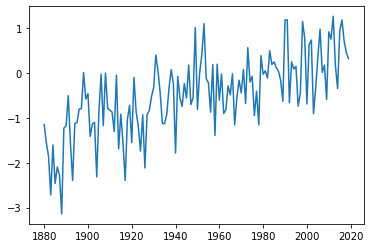

In [10]:
pp.plot(allyears, allavg - midcentury)

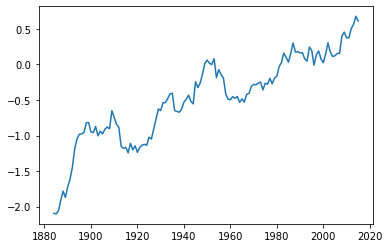

In [11]:
pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'))